In [1]:
%config Completer.use_jedi = False

In [2]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
THRESHOLD = 74

In [4]:
start = time.time()
data = pd.read_csv('train.csv')
end = time.time()
print(end - start)


1.2969884872436523


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9810,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38422,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18626,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

[  6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  26 130 130 222 255 255  52   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  31 214 253
 253 244 241 251 176   3   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  41 253 253 250 207  30   0  87 171  19   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  27 213 253
 249 184   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 149 253 253 134   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 215
 253 211  32   0   0   0   0   0   0   0   0   0   

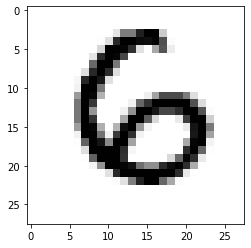

In [8]:
print(data.iloc[0].to_numpy())
pic = data.iloc[0].to_numpy()
plt.imshow(pic[1:].reshape(28,28), cmap="binary")


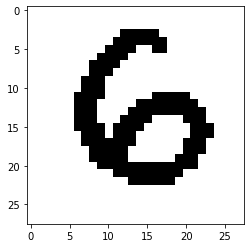

In [9]:

for i in range(1,len(pic)-1):
    if pic[i] >THRESHOLD:
        pic[i]=255
    else:
        pic[i]=0
plt.imshow(pic[1:].reshape(28,28), cmap="binary")

In [10]:
X = data.iloc [:,1:]#Frame (42000, 784)
y = data ["label"]#series (42000,)


In [11]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test, X_test, test_size=0.5, random_state=42)
# #train 29400, 0.70 of the data
# #test 6300, 0.3 of the data
# #validation 6300, 0.21 of the data 

# print(len(X_train),len(y_train))
# print(len(X_val),len(y_val))
# print(len(X_test),len(y_test))


sample = {"train": range(0,700), "val":range(700,850), "test":range(850,1000)}

X_train, X_test, X_val= X.iloc[sample["train"]], X.iloc[sample["test"]], X.iloc[sample["val"]]
y_train, y_test, y_val= y.iloc[sample["train"]], y.iloc[sample["test"]], y.iloc[sample["val"]]

print(X_train.iloc[1].to_numpy(), len(X_train.iloc[1].to_numpy()))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 139
 128  50  83 139  53   5   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  30 239 254 254 254 254 254 218 169 126
  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 216 254 254 254 254 254 254 254 254 247  42   

In [12]:
type(X_train)
X_train.shape

(700, 784)

In [13]:
# Applying the threshold condition
X_train=X_train.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test=X_test.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val=X_val.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
#print(X_train.iloc[1].to_numpy())

<div class=" alert alert-warning"> 

- Training set size: 500 
- Test set size: 200 
- validation set size: 200 
    
</div>

In [14]:
from sklearn.neural_network import MLPClassifier
num_layers_clf = [1]+[i*2 for i in range (1,6)]    # number of hidden layers,
num_neurons = 16       # number of neurons of each layer, we fix this to 16 in this task

hidden_layers = tuple([num_neurons]*num_layers_clf[1]) #16x16 for test


In [15]:
mlp_clf = MLPClassifier(hidden_layer_sizes= hidden_layers, max_iter = 2000, learning_rate_init = 0.01, random_state = 42, activation = 'relu')
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score
y_pred_train = mlp_clf.predict(X_train)
tr_acc = accuracy_score(y_train, y_pred_train)
print(tr_acc)

1.0


In [17]:
y_pred_val = mlp_clf.predict(X_val)
tr_acc = accuracy_score(y_val, y_pred_val)
print(tr_acc)

0.8466666666666667


In [18]:
y_pred_test = mlp_clf.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)

0.82
